## Descriptive Anlytics
- Client Exit Interviews (CEIs), the goal is to summarize and visualize key characteristics of the data.

### 1. Import Libraries

In [1]:
# Import libs
# from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import sys

sys.path.append('../src')
from utils import load_data, summary_percentage_table, display
from viz import plot_vertical_bar_chart, plot_distribution, plot_bar_chart_with_percentage, calculate_percentage_table

# Colors
colors = ['#005055', '#64afa0', '#6ec34b', '#198cc3']

# Channels
channels = ['MSI centre', 'Outreach', 'MS Lady']

### 2. Load the Dataset

In [2]:
# Maximum Display for data
display()

Display All Columns Feature Activated


In [3]:
# load the CEI dataset
data_file_path = '../data/processed/MSIA_2024_CEI_Afghanistan_data_cleaned.csv'
data = load_data(data_file_path)

In [37]:
# Read labels stata file
itr = pd.read_stata('../data/raw/MSI_2024_CEI_Afghanistan.dta', iterator=True)
itr.variable_labels()

{'starttime': 'starttime',
 'endtime': 'endtime',
 'deviceid': 'deviceid',
 'devicephonenum': 'devicephonenum',
 'subscriberid': 'subscriberid',
 'simid': 'simid',
 'DATAUSE': 'Client consent for sharing anonymous data',
 'DATE': "Enter today's date",
 'FACTYPE': 'Type of facility or site',
 'NAME_C': 'Enter the name of the Centre',
 'NAME_OR': 'Enter the name of the Outreach site',
 'NAME_SF': 'Enter the name of the Social Franchise',
 'NAME_MSL': 'Enter the name of the MS Lady/ site',
 'NAME_PSS': 'Enter the name of the PSS site',
 'NAME_OTH': 'Enter the name of the site',
 'REGION': 'Enter facility/site region',
 'LOCATION': 'Enter type of location',
 'TR2DH': 'How long did it take you to travel here today? Hours',
 'TR2DM': 'How long did it take you to travel here today? Minutes',
 'FPTYPE': 'FPTYPE',
 'FPTYPEFPMETH': 'Contraception: Contraceptive method(s) received',
 'FPTYPEFPREM': 'Contraception: Contraceptive method removed',
 'FPTYPEFPNO': 'Contraception: No contraceptive meth

### 3. Data Overview and Summary Statistics

In [4]:
# Check basic information and first few rows of the stata
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Columns: 372 entries, starttime to pillar1
dtypes: float64(20), int64(37), object(315)
memory usage: 965.0+ KB


In [39]:
# Summary statistics for numerical columns
data.describe()

,TR2DH,TR2DM,PAINOP_IMPREM,PAINSCALE_DREM,PAINSCALE_AREM,CMAUTO,PAINSCALE_DCM,PAINSCALE_ACM,AGE,CHILD,IDEALFS,_id,_index,id,FP,CHOICEtot,CHOICEtotAllMethods,NINFO,ENUMID,NMETH,countSRH,TR2D,m_educ,m_satt,m_cm,m_elct,m_wtr,m_sani,m_floor,m_roof,m_wall,m_hsg,m_ckfl,m_asst,mpiscore,hi_cm,hi_satt,hi_educ,hi_elct,hi_wtr,hi_sani,hi_hsg,hi_ckfl,hi_asst,himpiscore,lo_cm,lo_satt,lo_educ,lo_elct,lo_wtr,lo_sani,lo_hsg,lo_ckfl,lo_asst,lompiscore,mpi_sevpoor,pillar1
count,332.000000,332.000000,9.000000,18.000000,17.000000,330.000000,78.000000,78.000000,332.000000,332.000000,304.000000,3.320000e+02,332.000000,332.000000,332.000000,268.000000,268.000000,332.000000,332.000000,332.000000,332.000000,332.000000,330.000000,330.000000,332.000000,331.000000,311.000000,318.000000,332.000000,332.000000,332.00000,313.000000,316.000000,332.000000,306.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000
mean,0.319277,20.346386,222.666667,3.944444,3.352941,8.442424,3.743590,3.512821,30.268072,4.409639,4.789474,4.228135e+08,167.355422,167.274096,0.912651,3.059701,3.190299,1.030120,10.301205,0.578313,1.683735,39.503012,0.572727,0.439394,0.078313,0.338369,0.356913,0.676101,7.521084,5.698795,5.73494,0.437700,0.316456,0.280120,32.824981,0.078313,0.442771,0.575301,0.340361,0.397590,0.689759,0.469880,0.349398,0.280120,33.617804,0.078313,0.436747,0.569277,0.337349,0.334337,0.647590,0.412651,0.301205,0.280120,32.228915,0.225904,0.325301
std,0.729517,15.942984,332.500000,2.554632,2.737270,1.898172,2.645437,2.818048,7.148646,2.447200,2.187971,7.080085e+05,96.425042,96.423601,0.282773,2.096050,2.219504,0.919245,6.122584,0.494574,0.606591,50.408932,0.495434,0.497067,0.269069,0.473871,0.479861,0.468700,25.578790,22.377284,22.36883,0.496898,0.465831,0.449736,20.228001,0.269069,0.497464,0.495043,0.474546,0.490139,0.463290,0.499845,0.477499,0.449736,19.972869,0.269069,0.496732,0.495925,0.473519,0.472470,0.478442,0.493054,0.459474,0.449736,20.257378,0.418807,0.469194
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,4.213113e+08,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,10.000000,1.000000,2.000000,1.000000,8.000000,2.000000,1.000000,25.000000,3.000000,4.000000,4.222490e+08,84.750000,83.750000,1.000000,1.000000,1.000000,0.000000,5.000000,0.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,16.666666,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.666666,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.666666,0.000000,0.000000
50%,0.000000,15.000000,1.000000,3.500000,3.000000,9.000000,3.000000,3.000000,30.000000,4.000000,4.000000,4.229954e+08,167.500000,167.500000,1.000000,3.000000,3.000000,1.000000,9.000000,1.000000,2.000000,20.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,33.333332,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,33.333332,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,33.333332,0.000000,0.000000
75%,0.000000,30.000000,666.000000,4.750000,4.000000,10.000000,5.000000,5.000000,35.000000,6.000000,6.000000,4.232956e+08,250.250000,250.250000,1.000000,5.000000,5.000000,1.000000,14.000000,1.000000,2.000000,35.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.00000

In [40]:
# Data Collection Dates
overall_start_date = data['starttime'].min()  # Earliest start date
overall_end_date = data['endtime'].max()  # Latest end date

print(f"Data Collection Start Date: {overall_start_date}")
print(f"Data Collection End Date: {overall_end_date}")

Data Collection Start Date: 17-Dec-24
Data Collection End Date: 26-Dec-24


## Module 1: Interview and Site Information

### Variables
- 'DATE': "Enter today's date",
- 'FACTYPE': 'Type of facility or site',
- 'NAME_C': 'Enter the name of the Centre',
- 'NAME_OR': 'Enter the name of the Outreach site',
- 'NAME_SF': 'Enter the name of the Social Franchise',
- 'NAME_MSL': 'Enter the name of the MS Lady/ site',
- 'NAME_PSS': 'Enter the name of the PSS site',
- 'NAME_OTH': 'Enter the name of the site',
- 'REGION': 'Enter facility/site region',
- 'LOCATION': 'Enter type of location',

### Analysis Questions
1. How is the distribution of facility types across regions?
2. What is the most common location type for different facility types?


#### 1. How is the distribution of facility types across service channel?

In [41]:
# Distribution of surveys accorss each site
site_distribution = data.groupby('FACTYPE').size().reset_index(name="Total Surveys in Each Site")

site_distribution.sort_values(by='Total Surveys in Each Site', inplace=True, ascending=False)

site_distribution

,FACTYPE,Total Surveys in Each Site
1,MSI centre,114
2,Outreach,110
0,MS Lady,108


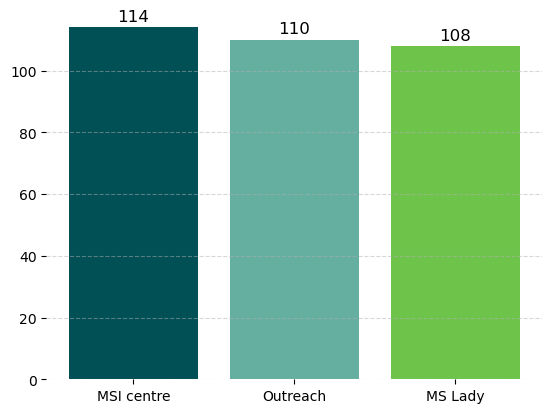

In [42]:
plot_vertical_bar_chart(site_distribution['FACTYPE'], site_distribution['Total Surveys in Each Site'], colors)

In [43]:
# How is the distribution of facility types across regions?

facility_types = data.groupby(['REGION', 'FACTYPE']).size().reset_index(name='Count')
facility_types.sort_values(by='REGION', inplace=True)

facility_types

,REGION,FACTYPE,Count
0,Central,MSI centre,29
1,East,MSI centre,10
2,North,MS Lady,64
3,North,MSI centre,32
4,North,Outreach,69
5,South,MS Lady,23
6,South,MSI centre,19
7,West,MS Lady,21
8,West,MSI centre,24
9,West,Outreach,41


In [44]:
# Add percentage/proportion column
region_totals = facility_types.groupby('REGION')['Count'].transform('sum')
facility_types['Percentage'] = (facility_types['Count'] / region_totals) * 100

In [45]:
facility_types

,REGION,FACTYPE,Count,Percentage
0,Central,MSI centre,29,100.000000
1,East,MSI centre,10,100.000000
2,North,MS Lady,64,38.787879
3,North,MSI centre,32,19.393939
4,North,Outreach,69,41.818182
5,South,MS Lady,23,54.761905
6,South,MSI centre,19,45.238095
7,West,MS Lady,21,24.418605
8,West,MSI centre,24,27.906977
9,West,Outreach,41,47.674419


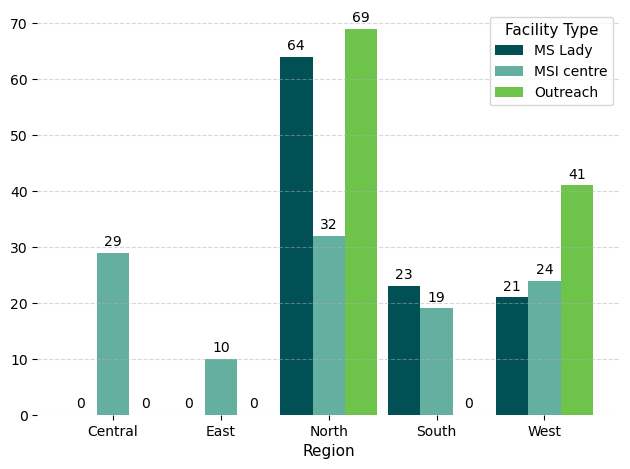

In [46]:
plot_distribution(facility_types, index='REGION', cols='FACTYPE', values='Count', colors=colors)

#### 2. What is the most common location type for different facility type channels?

In [47]:
# Step: Cross-tabulation or contingency table between FACTYPE and LOCATION

common_location_type = pd.crosstab(data['FACTYPE'], data['LOCATION'])

common_location_type

LOCATION,Peri-urban,Rural,Urban
FACTYPE,,,
MS Lady,10,38,60
MSI centre,5,10,99
Outreach,62,25,23


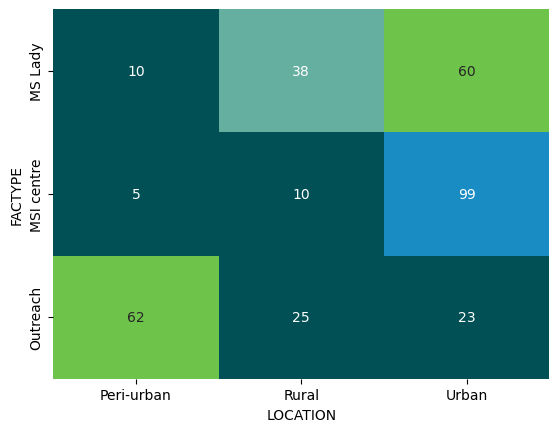

In [48]:
#heatmap for visualization of above table
sns.heatmap(common_location_type, annot=True, cmap=colors, fmt='d', cbar=False)
#plt.title("Facilty Type in Different Locations")
plt.show()

## Module 2: Demographic Module
### A. Demographic Profile
1. What is the age range and median age of the respondents?
2. What is the education distribution attained by the respondents?
3. What distribution of respondents are married, single, divorced, or widowed?
4. How many respondents have children, and what is the average number of children per respondent?

#### 1. What is the age range and median age of the respondents?

In [5]:
min_age = data['AGE'].min()
max_age = data['AGE'].max()
average_age = data['AGE'].mean()
median_age = data['AGE'].median()

print(f"The age range of respondents is: {min_age} to {max_age}")

print(f"The average age of respondents is {np.round(average_age, 2)} and median value is {round(median_age, 2)}")

The age range of respondents is: 15 to 55
The average age of respondents is 30.27 and median value is 30.0


#### 2. What is the education distribution attained by the respondents?

In [50]:
# Function to calculate percentage
def calculate_percentage(df, count_column):
    total = df[count_column].sum()
    df['Percentage'] = (df[count_column] / total) * 100
    return df

# Overall education level of respondents
education_level = data.groupby('EDU').size().reset_index(name='Count')

# Call the function to calculate percentage
education_level = calculate_percentage(education_level, 'Count')

# Sort the values by 'Count' in descending order
education_level.sort_values(by='Count', inplace=True, ascending=True)

education_level

,EDU,Count,Percentage
4,"Some secondary, vocational or technical",9,2.710843
5,Some tertiary or higher,16,4.819277
1,"Completed secondary, vocational or technical",17,5.120482
0,Completed primary,43,12.951807
3,Some primary,54,16.265060
2,None / non-formal,193,58.132530


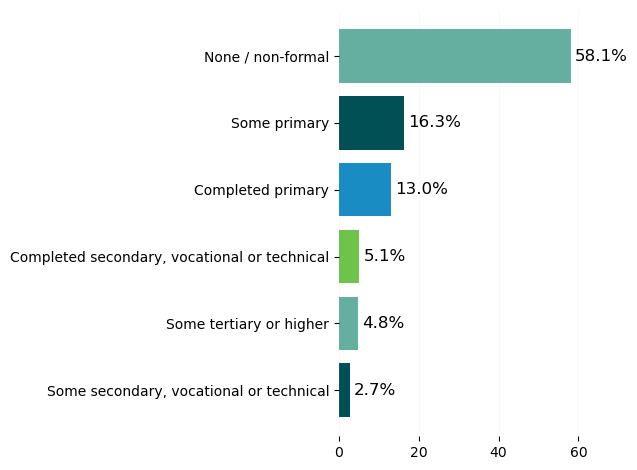

In [51]:
# Now, call the function with your data
plot_bar_chart_with_percentage(education_level, 'EDU', 'Count', colors=colors)

In [52]:
# channel-based education level of each respodent
data.groupby(['FACTYPE', 'EDU']).size().reset_index()

,FACTYPE,EDU,0
0,MS Lady,Completed primary,25
1,MS Lady,"Completed secondary, vocational or technical",12
2,MS Lady,None / non-formal,54
3,MS Lady,Some primary,13
4,MS Lady,"Some secondary, vocational or technical",3
5,MS Lady,Some tertiary or higher,1
6,MSI centre,Completed primary,17
7,MSI centre,"Completed secondary, vocational or technical",5
8,MSI centre,None / non-formal,59
9,MSI centre,Some primary,12


#### 3. What distribution of respondents are married, divorced, or widowed?

In [53]:
marital_status = data.groupby('MAR').size().reset_index(name="Count")

marital_status

,MAR,Count
0,Married,332


#### 4. How many respondents have children, and what is the average number of children per respondent?

In [54]:
data.groupby('CHILD').size().reset_index(name='Total Respondents')

,CHILD,Total Respondents
0,0,5
1,1,31
2,2,41
3,3,60
4,4,50
5,5,47
6,6,34
7,7,17
8,8,24
9,9,12


In [55]:
print(f"Five respondents reported that they have {data['CHILD'].min()} number of children.")
print(f"On Average the respondents reported {round(data['CHILD'].mean(), 0)} number of children.")

Five respondents reported that they have 0 number of children.
On Average the respondents reported 4.0 number of children.


### B. Employment and Displacement
1. What are the most common occupations of the respondents?
2. What percentage of respondents have experienced displacement?
3. What are the primary reasons for displacement?

#### 1. What are the most common occupations of the respondents?

In [56]:
occupation = data.groupby('JOB').size().reset_index(name='Total Respondents')

occupation.sort_values(by='Total Respondents', inplace=True)

occupation

,JOB,Total Respondents
4,Skilled manual,1
7,Unskilled manual - paid,1
0,Agriculture - paid,2
1,Agriculture - unpaid,3
3,Professional / technical / managerial,16
5,"Unemployed, looking for work",17
6,"Unemployed, not looking for paid work",70
2,Homemaker,222


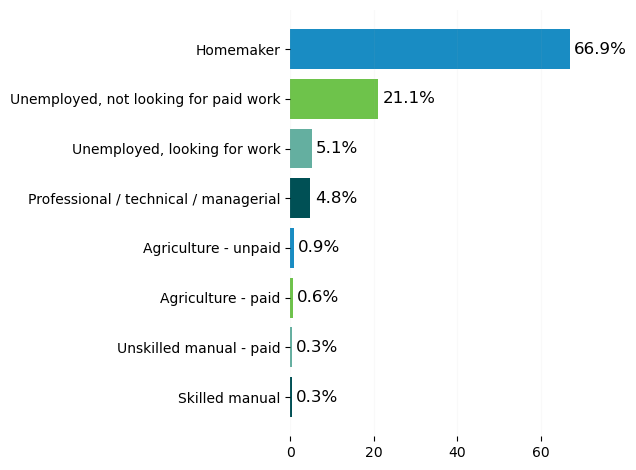

In [57]:
# Visualize job distribution
plot_bar_chart_with_percentage(occupation, 'JOB', 'Total Respondents', colors=colors)

#### 2. What percentage of respondents have experienced displacement?



In [58]:
displaced = data.groupby('DISPLACED').size().reset_index(name = 'Count')

displaced['Percentage'] = (displaced['Count'] / len(data)) * 100

displaced.sort_values(by='Count', inplace=True, ascending=False)

displaced

,DISPLACED,Count,Percentage
0,No,290,87.349398
1,Yes,42,12.650602


In [59]:
# Count the number of respondents who are displaced
displaced_count = data[data['DISPLACED'] == 'Yes'].shape[0]

# Calculate the displaced percentage
displaced_percentage = (displaced_count / len(data)) * 100

# Printing the result
print(f"{displaced_percentage:.2f}% responded that they have been displaced from their original hometown.")

12.65% responded that they have been displaced from their original hometown.


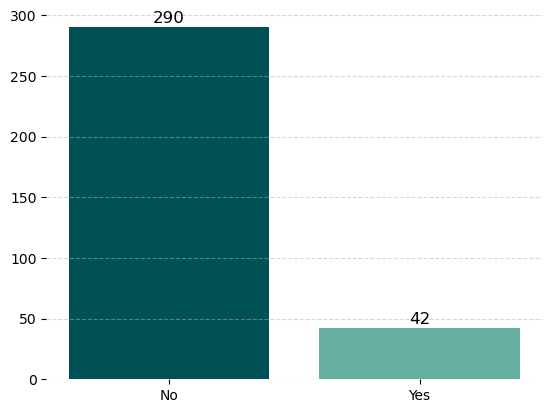

In [60]:
plot_vertical_bar_chart(displaced['DISPLACED'], displaced['Count'], colors)

#### 4. What are the primary reasons for displacement?

In [6]:
# The primary displacement reason

displacedment_reasons = data[data['DISPLACED'] == 'Yes'].groupby('WHY_DISPB').size().reset_index(name='Number of Respondents Displaced')

displacedment_reasons.sort_values(by='Number of Respondents Displaced', inplace=True, ascending=True)

displacedment_reasons

,WHY_DISPB,Number of Respondents Displaced
2,Education,1
4,Other,1
0,Displacement due to natural disaster/climate c...,6
3,Forced displacement due to armed conflict and ...,10
1,Economic reasons,21


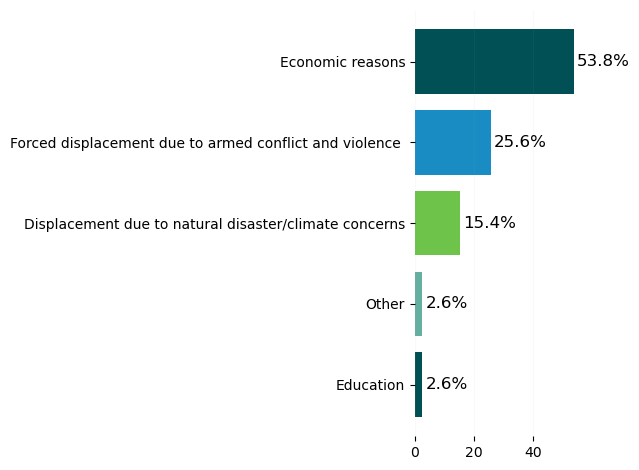

In [7]:
plot_bar_chart_with_percentage(displacedment_reasons, 'WHY_DISPB', 'Number of Respondents Displaced', colors=colors)

### C. Disabilities and Accessibility
1. What percentage of respondents report difficulty in seeing, hearing, walking, or climbing steps?
2. A region-wise analysis to identify the portion of beneficieries with disabilities.

#### Variables:
- DIS1: Do you have difficulty seeing?
- DIS2: Do you have difficulty hearing?
- DIS3: Do you have difficulty sitting, standing, walking or climbing steps? -
- DIS4: Do you have difficulty remembering or concentrating?
- DIS5: Do you have difficulty with self-care?
- DIS6: Using your usual language, do you have difficulty communicating?

#### Formula to Calculate Disability Prevalence:

- Disability=Any response in {Seeing, Hearing, Walking, Remembering, Self-care, Communicating} ≥ 3

- Responses should be coded as:
1 = No difficulty
2 = Some difficulty
3 = A lot of difficulty
4 = Cannot do it at all

- Prevalence Rate = (Number of Respondents with a Disability / Total Number of Respondents) * 100

In [9]:
# original responses
data['DIS1'].unique()

array(['No - no difficulty', 'Yes – some difficulty',
       'Yes – a lot of difficulty'], dtype=object)

In [10]:
# Columns related to disability
disability_columns = ["DIS1", "DIS2", "DIS3", "DIS4", "DIS5", "DIS6"]

In [11]:
# Mapping dictionary
response_map = {
    "No - no difficulty": 1,
    "Yes – some difficulty": 2,
    "Yes – a lot of difficulty": 3,
    "Cannot do it at all": 4,
}

In [12]:
data[disability_columns] = data[disability_columns].applymap(response_map.get)

In [13]:
# Define a function to identify disability
def has_disability(row):
  return any(row >= 3)

In [14]:
# Apply the function across rows
data['Disability'] = data[disability_columns].apply(lambda row: has_disability(row), axis=1)

In [15]:
data['Disability'].head()

0    False
1    False
2    False
3    False
4    False
Name: Disability, dtype: bool

In [16]:
prevalence_rate = (data['Disability'].sum() / len(data)) * 100

In [17]:
# Output results
print(f"Disability Prevalence Rate: {prevalence_rate:.2f}%")

Disability Prevalence Rate: 7.23%


In [18]:
# Count the number of respondents with and without a disability
disability_counts = data['Disability'].value_counts().reset_index(name='Count')
disability_counts

,Disability,Count
0,False,308
1,True,24


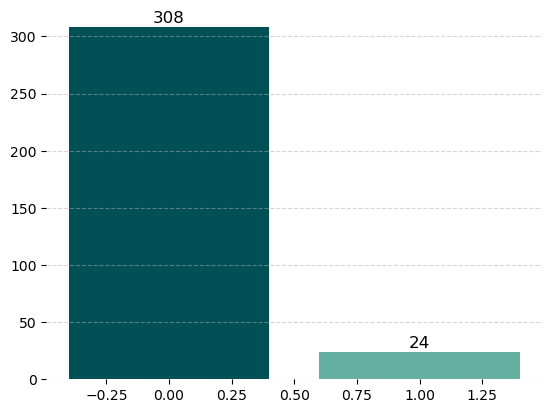

In [19]:
plot_vertical_bar_chart(disability_counts['Disability'], disability_counts['Count'], colors)

In [20]:
region_wise_disability = data.groupby(['FACTYPE', 'Disability']).size().reset_index(name='Total')
region_wise_disability

,FACTYPE,Disability,Total
0,MS Lady,False,95
1,MS Lady,True,13
2,MSI centre,False,108
3,MSI centre,True,6
4,Outreach,False,105
5,Outreach,True,5


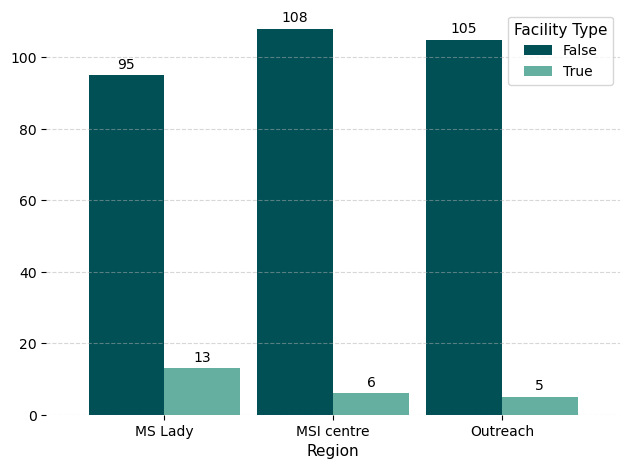

In [21]:
plot_distribution(region_wise_disability, index='FACTYPE', cols='Disability', values='Total', colors=colors)

### C. Household and Living Conditions
1. What percentage of households have completed six years or more of schooling?
2. Are children in the household aged 5–13 currently attending school?
3. What is the proportion of households that have experienced the death of a member under 18 in the past five years?
4. What are the primary materials used for floors, walls, and roofs in households?
5. Is the toilet or latrine shared with other households?
6. What are the most common types of toilet facilities in the surveyed households?
7. How far do respondents travel to access drinking water?
8. What is the source of drinking water in your household?
9. What percentage of households have electricity?

In [5]:
question_mapping = {
    'MPI_YS': 'What percentage of households have completed six years or more of schooling?',
    'MPI_SCA': 'Are children in the household aged 5–13 currently attending school?',
    'MPI_CM': 'What is the proportion of households that have experienced the death of a member under 18 in the past five years?',
    'MPI_FLR': 'What are the primary materials used for floors, walls, and roofs in households?',
    'MPI_TOSHR': 'Is the toilet or latrine shared with other households?',
    'MPI_TO': 'What are the most common types of toilet facilities in the surveyed households?',
    'MPI_WATDIS': 'How long does it take to get to your drinking water source, get water and come back?',
    'MPI_WAT': 'What is the source of drinking water in your household?',
    'MPI_ELEC': 'Do you have electricity at home?',
}

variable_list = list(question_mapping.keys())  # Replace with your list of questions

# Generate the summary table
summary_table = summary_percentage_table(
    data,
    variable_list,
    question_mapping,
    channels_column='FACTYPE',
    channels=channels
)

# Display the result
summary_table

,Question,Answers,MSI centre,Outreach,MS Lady,Total
0,What percentage of households have completed s...,Yes,44.74%,30.00%,52.78%,42.50%
1,What percentage of households have completed s...,No,54.39%,69.09%,47.22%,56.90%
2,What percentage of households have completed s...,Refused,0.88%,0.91%,0.00%,0.60%
3,Are children in the household aged 5–13 curren...,No,43.86%,30.91%,56.48%,43.75%
4,Are children in the household aged 5–13 curren...,Yes,53.51%,68.18%,41.67%,54.45%
5,Are children in the household aged 5–13 curren...,Not applicable (no household members in the ag...,1.75%,0.91%,0.93%,1.20%
6,Are children in the household aged 5–13 curren...,Refused,0.88%,0.00%,0.93%,0.60%
7,What is the proportion of households that have...,No,95.61%,91.82%,88.89%,92.11%
8,What is the proportion of households that have...,Yes,4.39%,8.18%,11.11%,7.89%
9,What are the primary materials used for floors...,"Parquet or polished wood, vinyl or asphalt str...",75.44%,43.64%,49.07%,56.05%


In [ ]:
# Save the summary table to an Excel file
file_path = '../analysis_results/Household and Living Conditions.xlsx'  # Save to the current directory in Colab
summary_table.to_excel(file_path, index=False, sheet_name="Summary Table")

# Automatically download the file
#files.download(file_path)


### D. Assets and Resources

1. What type of cooking fuel is most commonly used by respondents?
2. What percentage of households own cars, trucks, or other significant assets?
3. How many households own multiple assets, such as telephones, radios, etc.?

In [8]:


# Mapping variable names to full text
question_mapping = {
    'MPI_CF': 'What type of fuel does your household mainly use for cooking?',
    'MPI_TRUCK': 'Does your household own a car or truck?',
    'MPI_ASSETS': 'Does your household own more than one of the following assets?  Telephone, radio',
}

variable_list = list(question_mapping.keys())  # Replace with your list of questions

# Generate the summary table
assets_and_resources = summary_percentage_table(
    data,
    variable_list,
    question_mapping,
    channels_column='FACTYPE',
    channels=channels
)

# Display the result
assets_and_resources

,Question,Answers,MSI centre,Outreach,MS Lady,Total
0,What type of fuel does your household mainly u...,"Electricity, liquid propane gas (LPG), natural...",76.32%,63.64%,54.63%,64.86%
1,What type of fuel does your household mainly u...,"Straw/shrubs/grass, agricultural crop, animal ...",15.79%,36.36%,38.89%,30.35%
2,What type of fuel does your household mainly u...,Other,7.89%,0.00%,5.56%,4.48%
3,What type of fuel does your household mainly u...,Refused,0.00%,0.00%,0.93%,0.31%
4,Does your household own a car or truck?,No,75.44%,95.45%,90.74%,87.21%
5,Does your household own a car or truck?,Yes,24.56%,4.55%,9.26%,12.79%
6,Does your household own more than one of the f...,Yes,56.14%,70.91%,50.00%,59.02%
7,Does your household own more than one of the f...,No,19.30%,23.64%,38.89%,27.27%
8,Does your household own more than one of the f...,Refused,0.00%,0.91%,1.85%,0.92%


In [9]:
# Save the summary table to an Excel file
file_path = '../analysis_results/Assets and Resources.xlsx'  # Save to the current directory in Colab
assets_and_resources.to_excel(file_path, index=False, sheet_name="Summary Table")

# Automatically download the file
# files.download(file_path)

# Module 2: Service Access and Uptake

### 1. Service Access

In [11]:
service_access_variables = {
    'TR2DH': 'How long did it take you to travel here today? Hours',
    'TR2DM': 'How long did it take you to travel here today? Minutes',
    'HOURS': 'Was it clear to you what hours the facility was open/when you could come in to receive services?',
    'FEED': 'Were you informed on how to give feedback or complain about your experience today?'
}

variable_list = list(service_access_variables.keys())  # Replace with your list of questions

# Generate the summary table
service_access_table = summary_percentage_table(
    data,
    variable_list,
    service_access_variables,
    channels_column='FACTYPE',
    channels=channels
)

# Display the result
service_access_table

,Question,Answers,MSI centre,Outreach,MS Lady,Total
0,How long did it take you to travel here today?...,0,71.05%,98.18%,66.67%,78.63%
1,How long did it take you to travel here today?...,2,6.14%,0.00%,8.33%,4.82%
2,How long did it take you to travel here today?...,1,22.81%,1.82%,17.59%,14.07%
3,How long did it take you to travel here today?...,6,0.00%,0.00%,0.93%,0.31%
4,How long did it take you to travel here today?...,3,0.00%,0.00%,6.48%,2.16%
5,How long did it take you to travel here today?...,20,13.16%,7.27%,10.19%,10.21%
6,How long did it take you to travel here today?...,10,16.67%,31.82%,25.93%,24.80%
7,How long did it take you to travel here today?...,0,6.14%,0.91%,0.93%,2.66%
8,How long did it take you to travel here today?...,15,11.40%,20.91%,11.11%,14.47%
9,How long did it take you to travel here today?...,30,27.19%,3.64%,23.15%,17.99%


In [12]:
# Save the summary table to an Excel file
file_path = '../analysis_results/service_access_table.xlsx'  # Save to the current directory in Colab
service_access_table.to_excel(file_path, index=False, sheet_name="Summary Table")

# Automatically download the file
# files.download(file_path)

### 2. Service Update

In [13]:
service_update_variables = {
    'GEN_SAT': 'Overall, how satisfied are you with your experience with us today?',
    'REC': 'Based on your experience today, how likely are you to recommend our services?',
    'RET': 'Based on your experience today, if you needed a similar service in the future, how likely are you to return?',
    'PRIV': 'I had enough privacy during my visit today.',
    'REST': 'I was treated with respect by all staff during my visit today.',
    'WAIT': 'The time I waited to see a provider today was acceptable.',
    'CARE': 'The provider was easy to understand.',
    'ENOUGH': 'The provider gave me enough information to make the best decisions about my method.',
    'SERIOUS': 'The provider took my preferences seriously.',
    'RPRT': 'The provider gave me the opportunity to explain my needs and ask questions.',
    'COMFORT': 'All staff members made me comfortable during my visit today.',
    'IMPEDU': 'Do you feel that the service you received today will have a positive Impact on education',
    'IMPWRK': 'Do you feel that the service you received today will have a positive Impact on work',
    'IMPFAM': 'Do you feel that the service you received today will have a positive Impact on family',
    'IMPHLTH': 'Do you feel that the service you received today will have a positive Impact on health',
    'IMPOTH': 'Do you feel that the service you received today will have a positive Impact on other aspects of life',
    'IMPNONE': 'No perceived impact',
    'IMPDK': 'Don’t know if there was an impact',
    'IMPREF': 'Do you feel that the service(s) you received today will have a positive Impact on preferences'
}

variable_list = list(service_update_variables.keys())  # Replace with your list of questions

# Generate the summary table
service_update_table = summary_percentage_table(
    data,
    variable_list,
    service_update_variables,
    channels_column='FACTYPE',
    channels=channels
)

# Display the result
service_update_table

,Question,Answers,MSI centre,Outreach,MS Lady,Total
0,"Overall, how satisfied are you with your exper...",Very satisfied,87.72%,89.09%,97.22%,91.34%
1,"Overall, how satisfied are you with your exper...",Somewhat satisfied,8.77%,10.91%,1.85%,7.18%
2,"Overall, how satisfied are you with your exper...",Somewhat dissatisfied,2.63%,0.00%,0.93%,1.19%
3,"Overall, how satisfied are you with your exper...",Refused,0.88%,0.00%,0.00%,0.29%
4,"Based on your experience today, how likely are...",Promoter -Very Likely,82.46%,86.36%,77.78%,82.20%
5,"Based on your experience today, how likely are...",Passive -Neutral,13.16%,9.09%,19.44%,13.90%
6,"Based on your experience today, how likely are...",Detractor -unlikely,3.51%,3.64%,2.78%,3.31%
7,"Based on your experience today, if you needed ...",Promoter -Very Likely,84.21%,90.91%,83.33%,86.15%
8,"Based on your experience today, if you needed ...",Passive -Neutral,8.77%,4.55%,14.81%,9.38%
9,"Based on your experience today, if you needed ...",Detractor -unlikely,7.02%,2.73%,1.85%,3.87%


In [14]:
# Save the summary table to an Excel file
file_path = '../analysis_results/service_update_table.xlsx'  # Save to the current directory in Colab
service_update_table.to_excel(file_path, index=False, sheet_name="Summary Table")

# Automatically download the file
# files.download(file_path)

##  Module 3: Family Planning History

In [15]:
# Calculate percentage and count of "Yes" and "No" for FPEVER
family_planning_variables = {
    "FPEVER": "Have you ever used a method of contraception before today?",
    "FPWANT": "Do you currently want to be using any method of contraception?",
    "FPCURR": "Have you or your partner used any method of contraception during the past 3 months?",
    "CMETH": "What was the main method of contraception that you were using in the past 3 months?",
    "Prev_FPmethod": "(Calculation or record of the previous FP method).",
    "FPWHERE": "Prior to your visit today, where did you get the method that you were using most recently?",
    "CMADD": "Have you or your partner/s used any additional methods of contraception in the past 3 months?",
    "CMCURWNT": "Prior to your visit today, did you want to be using the method?",
    "CMACCESS": "Have there been times you wanted to use this method but could not access it?"
}

variable_list = list(family_planning_variables.keys())

# Generate the summary table
family_planning_table = summary_percentage_table(
    data,
    variable_list,
    family_planning_variables,
    channels_column='FACTYPE',
    channels=channels
)

# Display the result
family_planning_table

,Question,Answers,MSI centre,Outreach,MS Lady,Total
0,Have you ever used a method of contraception b...,Yes,83.33%,91.82%,92.59%,89.25%
1,Have you ever used a method of contraception b...,No,15.79%,8.18%,7.41%,10.46%
2,Have you ever used a method of contraception b...,Refused,0.88%,0.00%,0.00%,0.29%
3,Do you currently want to be using any method o...,Yes,84.21%,84.55%,89.81%,86.19%
4,Do you currently want to be using any method o...,No,14.04%,12.73%,7.41%,11.39%
5,Do you currently want to be using any method o...,Don't know,0.88%,0.91%,2.78%,1.52%
6,Do you currently want to be using any method o...,Sometimes,0.88%,0.91%,0.00%,0.60%
7,Do you currently want to be using any method o...,Refused,0.00%,0.91%,0.00%,0.30%
8,Have you or your partner used any method of co...,Yes,68.42%,71.82%,80.56%,73.60%
9,Have you or your partner used any method of co...,No,13.16%,13.64%,11.11%,12.64%


In [16]:
# Save the summary table to an Excel file
file_path = '../analysis_results/family_planning_history.xlsx'  # Save to the current directory in Colab
family_planning_table.to_excel(file_path, index=False, sheet_name="Summary Table")

# Automatically download the file
# files.download(file_path)

## Module 4: Family Planning Counselling

In [17]:
family_planning_counselling_variables = {
    'WNTMETH': 'When you came here today, did you want to receive a method of contraception from?',
    'SPCMTH': 'When you came here today, was there a specific FP method you wanted to get?',
    'WAMETH': 'Which method did you want to get when you came here today?',
    'RECMETH': 'Did you receive a method of contraception, or a referral to receive a method?',
    'CHMETH': 'Did you receive the method you wanted, or a referral for the method you wanted?',
    'METHNO': "What was the main reason you didn't receive a method or a referral for a method?",
    'CMREASON': 'You mentioned that you did not want or weren’t sure if you wanted a method of contraception?',
    'RECCOUN': 'Did the provider tell you about any potential side effects or problems you may experience?',
    'FOLLUP': 'Were you told what to do if you experience any side effects or problems as a result?',
    'CONTUSE': 'Were you told about the possibility of switching to another method if the method you selected was not suitable?',
    'OTHERMETH': 'Were you told by the provider about other methods of contraception besides the one chosen?'
}



variable_list = list(family_planning_counselling_variables.keys())

# Generate the summary table
family_planning_counselling_table = summary_percentage_table(
    data,
    variable_list,
    family_planning_counselling_variables,
    channels_column='FACTYPE',
    channels=channels
)

# Display the result
family_planning_counselling_table

,Question,Answers,MSI centre,Outreach,MS Lady,Total
0,"When you came here today, did you want to rece...",Yes,90.35%,95.45%,90.74%,92.18%
1,"When you came here today, did you want to rece...",No,8.77%,3.64%,8.33%,6.91%
2,"When you came here today, did you want to rece...",Don't know,0.88%,0.00%,0.93%,0.60%
3,"When you came here today, did you want to rece...",Refused,0.00%,0.91%,0.00%,0.30%
4,"When you came here today, was there a specific...",Yes,84.21%,92.73%,87.04%,87.99%
5,"When you came here today, was there a specific...",No,5.26%,2.73%,3.70%,3.90%
6,"When you came here today, was there a specific...",Don't know,0.88%,0.00%,0.00%,0.29%
7,Which method did you want to get when you came...,Intra-uterine system or device,22.81%,3.64%,5.56%,10.67%
8,Which method did you want to get when you came...,Implants,16.67%,8.18%,9.26%,11.37%
9,Which method did you want to get when you came...,Contraceptive pills,13.16%,20.91%,24.07%,19.38%


In [18]:
# Save the summary table to an Excel file
file_path = '../analysis_results/family_planning_counselling_table.xlsx'  # Save to the current directory in Colab
family_planning_counselling_table.to_excel(file_path, index=False, sheet_name="Summary Table")

# Automatically download the file
# files.download(file_path)

##  Module 5: Client Experience
- Identifying strategic goals:
By evaluating current performance in
client experience and client reach, CEI
data can help identify opportunities
to adapt or improve service delivery
to maintain quality care and achieve
further improvement.
- Purpose: To understand what information
the client received during
their visit, how they felt about
their interactions with staff
and service providers, and
their overall satisfaction with
their visit.
- Adaptation Considerations: Consider including questions that explore the information clients received, and client
perceptions of the delivery and communication
of this information.

-  What is the experience of clients accessing
your services? This can be answered by
evaluating client experience questions,
satisfaction scores, and client perception of the
information provided about their services.

In [19]:
client_expereince_variables = {
    'REC': 'Based on your experience today, how likely are you to recommend our services to ',
    'RET': 'Based on your experience today, if you needed a similar service in the future, how likely is it that you would return to this site or provider? ',
    'HOURS': 'Was it clear to you what hours the facility was open/ when you could come to receive services today?',
    'FEED': 'Were you informed on how to give feedback or complain about your experience today?',
    'PRIVINFO': 'Do you trust the provider to keep your personal information private?',
    'PAIN_CM': 'Did the provider explain to you the possibility of experiencing pain during your',
    'PAINMAN_CM': ' Did the provider explain options for managing pain before your procedure?',
    'PAINOP_IMP': 'What options were explained to you?',
    'PAINOP_IMP1': 'Local anaesthesia',
    'PAINOP_IMP2': 'Medication for anxiety',
    'PAINOP_IMP3': 'Vocal local',
    'PAINOP_IMP666': 'Other',
    'PAINOP_IMP999': "Don't know",
    'PAINOP_IMP888': 'Refused',
    'PAINOP_IUD': 'What options were explained to you?',
    'PAINOP_IUD1': 'Oral analgesics',
    'PAINOP_IUD2': 'Local cream/spray on cervix',
    'PAINOP_IUD3': 'Paracervical block (injection next to the cervix)',
    'PAINOP_IUD4': 'Vocal local',
    'PAINOP_IUD666': 'Other',
    'PAINOP_IUD999': "Don't know",
    'PAINOP_IUD888': 'Refused',
    'MEDBEF_CM': 'Were you offered pain medication before the procedure?',
    'PAINSCALE_DCM': 'From 0-10, what was your pain during the procedure?',
    'PAINDUR_CM': 'Were you asked about pain during the procedure?',
    'MEDDUR_CM': 'Were you offered pain medication during the procedure?',
    'PAINSCALE_ACM': 'From 0-10, what was your pain after the procedure?',
    'PAINAFT_CM': 'Were you asked about pain after the procedure?',
    'MEDAFT_CM': 'Were you offered pain medication after the procedure?',
    'PAINRES_CM': 'Did you feel that the provider was respectful and responsive to your pain?',
}

variable_list = list(client_expereince_variables.keys())

# Generate the summary table
client_expereince_table = summary_percentage_table(
    data,
    variable_list,
    client_expereince_variables,
    channels_column='FACTYPE',
    channels=channels
)

# Display the result
client_expereince_table

,Question,Answers,MSI centre,Outreach,MS Lady,Total
0,"Based on your experience today, how likely are...",Promoter -Very Likely,82.46%,86.36%,77.78%,82.20%
1,"Based on your experience today, how likely are...",Passive -Neutral,13.16%,9.09%,19.44%,13.90%
2,"Based on your experience today, how likely are...",Detractor -unlikely,3.51%,3.64%,2.78%,3.31%
3,"Based on your experience today, if you needed ...",Promoter -Very Likely,84.21%,90.91%,83.33%,86.15%
4,"Based on your experience today, if you needed ...",Passive -Neutral,8.77%,4.55%,14.81%,9.38%
5,"Based on your experience today, if you needed ...",Detractor -unlikely,7.02%,2.73%,1.85%,3.87%
6,Was it clear to you what hours the facility wa...,Yes,92.11%,8.18%,92.59%,64.29%
7,Was it clear to you what hours the facility wa...,No,4.39%,55.45%,2.78%,20.87%
8,Was it clear to you what hours the facility wa...,Don't know,3.51%,34.55%,4.63%,14.23%
9,Was it clear to you what hours the facility wa...,Refused,0.00%,1.82%,0.00%,0.61%


In [20]:
# Save the summary table to an Excel file
file_path = '../analysis_results/client_expereince_table.xlsx'  # Save to the current directory in Colab
client_expereince_table.to_excel(file_path, index=False, sheet_name="Summary Table")

# Automatically download the file
# files.download(file_path)

#### Client Statisfaction
- 'PRIV': 'I had enough privacy during my visit today',
- 'REST': 'I was treated with respect by all staff during my visit today',
- 'WAIT': 'The time I waited to see a provider today was acceptable',
- 'CARE': 'The provider was easy to understand ',
- 'ENOUGH': 'The provider gave me enough information to make the best decisions about my meth',
- 'SERIOUS': 'The provider took my preferences seriously ',
- 'RPRT': 'The provider gave me the opportunity to explain my needs and ask questions ',
- 'COMFORT': 'All staff members made me comfortable during my visit today',
- 'GEN_SAT': 'Overall, how satisfied are you with your experience with us today?',

In [43]:
# Client Satisfaction Experience Questions
client_satisfaction_experience = {
    'PRIV': 'I had enough privacy during my visit today',
    'REST': 'I was treated with respect by all staff during my visit today',
    'WAIT': 'The time I waited to see a provider today was acceptable',
    'CARE': 'The provider was easy to understand',
    'ENOUGH': 'The provider gave me enough information to make the best decisions about my method',
    'SERIOUS': 'The provider took my preferences seriously',
    'RPRT': 'The provider gave me the opportunity to explain my needs and ask questions',
    'COMFORT': 'All staff members made me comfortable during my visit today',
    'GEN_SAT': 'Overall, how satisfied are you with your experience with us today?',
}

variable_list = list(client_satisfaction_experience.keys())

# Generate the summary table
client_satisfaction_table = summary_percentage_table(
    data,
    variable_list,
    client_satisfaction_experience,
    channels_column='FACTYPE',
    channels=channels
)

# Display the result
client_satisfaction_table

,Question,Answers,MSI centre,Outreach,MS Lady,Total
0,I had enough privacy during my visit today,Strongly agree,44.74%,16.36%,49.07%,36.72%
1,I had enough privacy during my visit today,Agree,54.39%,20.91%,50.00%,41.77%
2,I had enough privacy during my visit today,Disagree,0.88%,54.55%,0.00%,18.47%
3,I had enough privacy during my visit today,Don't know,0.00%,0.91%,0.93%,0.61%
4,I had enough privacy during my visit today,Strongly disagree,0.00%,6.36%,0.00%,2.12%
5,I had enough privacy during my visit today,Refused,0.00%,0.91%,0.00%,0.30%
6,I was treated with respect by all staff during...,Strongly agree,42.11%,32.73%,58.33%,44.39%
7,I was treated with respect by all staff during...,Agree,55.26%,62.73%,39.81%,52.60%
8,I was treated with respect by all staff during...,Neither agree nor disagree,0.88%,2.73%,0.93%,1.51%
9,I was treated with respect by all staff during...,Strongly disagree,0.00%,0.00%,0.93%,0.31%


In [44]:
# Save the summary table to an Excel file
file_path = '../analysis_results/client_satisfaction_table.xlsx'  # Save to the current directory in Colab
client_satisfaction_table.to_excel(file_path, index=False, sheet_name="Summary Table")

# Automatically download the file
# files.download(file_path)

In [22]:
# 'PRIV': 'I had enough privacy during my visit today',

# Generate table
table = calculate_percentage_table(data, 'PRIV')
table.sort_values(by='% of beneficiaries for PRIV', ascending=True, inplace=True)

table

,PRIV,Count,% of beneficiaries for PRIV
3,Refused,1,0.301205
2,Don't know,2,0.602410
5,Strongly disagree,7,2.108434
1,Disagree,61,18.373494
4,Strongly agree,122,36.746988
0,Agree,139,41.867470


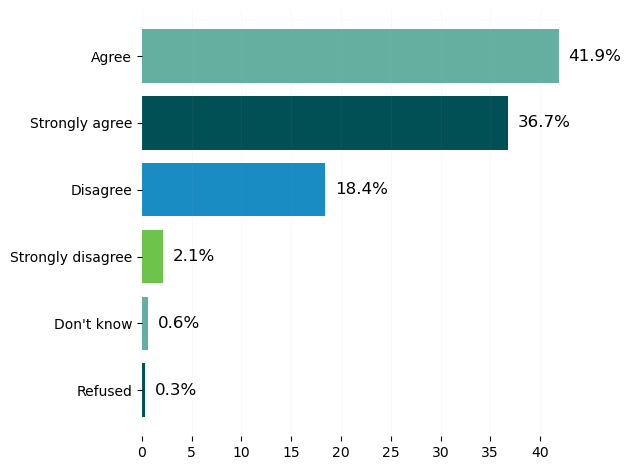

In [24]:
# Plot chart
plot_bar_chart_with_percentage(table, 'PRIV', 'Count', colors=colors)

In [25]:
# REST: I was treated with respect by all staff during my visit today

# Generate table
table = calculate_percentage_table(data, 'REST')
table.sort_values(by='% of beneficiaries for REST', ascending=True, inplace=True)

table

,REST,Count,% of beneficiaries for REST
2,Don't know,1,0.301205
4,Refused,1,0.301205
6,Strongly disagree,1,0.301205
1,Disagree,2,0.602410
3,Neither agree nor disagree,5,1.506024
5,Strongly agree,147,44.277108
0,Agree,175,52.710843


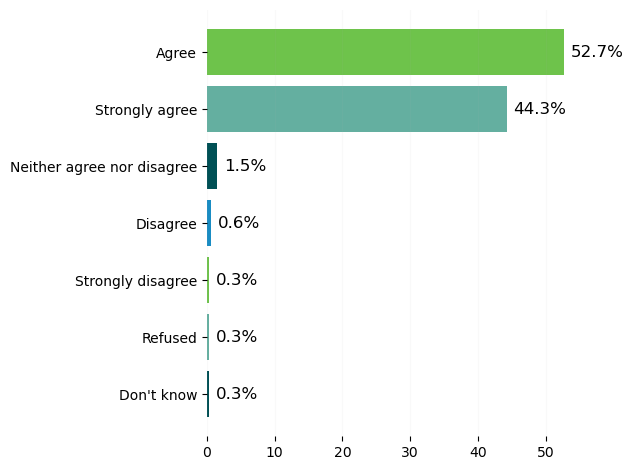

In [26]:
# Plot chart
plot_bar_chart_with_percentage(table, 'REST', 'Count', colors=colors)

In [27]:
# 'WAIT': 'The time I waited to see a provider today was acceptable'

# Generate table
table = calculate_percentage_table(data, 'WAIT')
table.sort_values(by='% of beneficiaries for WAIT', ascending=True, inplace=True)
table

,WAIT,Count,% of beneficiaries for WAIT
3,Strongly disagree,2,0.602410
1,Neither agree nor disagree,6,1.807229
2,Strongly agree,119,35.843373
0,Agree,205,61.746988


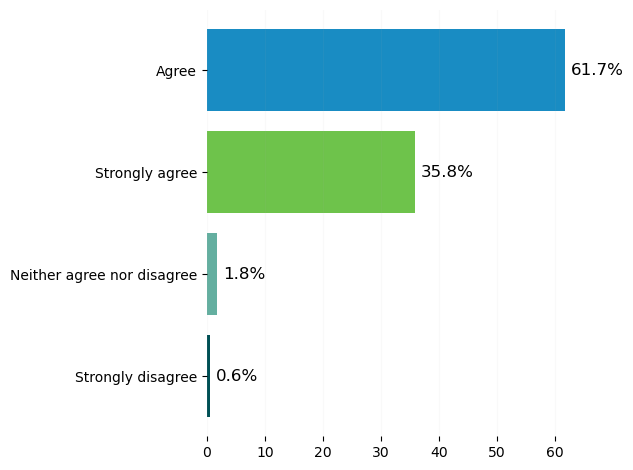

In [28]:
# Plot chart
plot_bar_chart_with_percentage(table, 'WAIT', 'Count', colors=colors)

In [29]:
# 'CARE': 'The provider was easy to understand',

# Generate table
table = calculate_percentage_table(data, 'CARE')
table.sort_values(by='% of beneficiaries for CARE', ascending=True, inplace=True)
table

,CARE,Count,% of beneficiaries for CARE
1,Disagree,1,0.301205
4,Strongly disagree,2,0.602410
2,Neither agree nor disagree,5,1.506024
3,Strongly agree,140,42.168675
0,Agree,184,55.421687


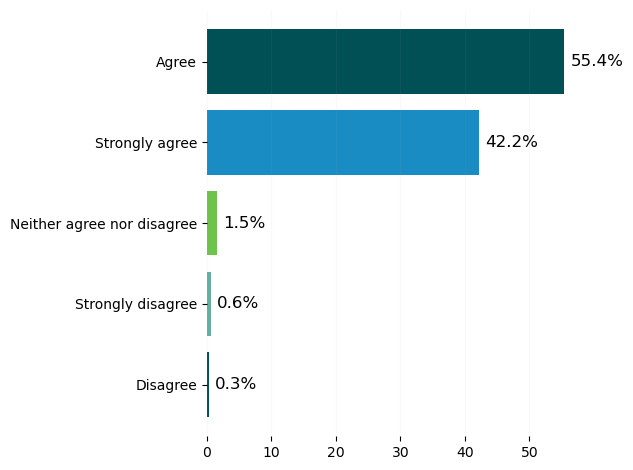

In [30]:
# Plot chart
plot_bar_chart_with_percentage(table, 'CARE', 'Count', colors=colors)

In [31]:
# 'ENOUGH': 'The provider gave me enough information to make the best decisions about my method',

# Generate table
table = calculate_percentage_table(data, 'ENOUGH')
table.sort_values(by='% of beneficiaries for ENOUGH', ascending=True, inplace=True)
table

,ENOUGH,Count,% of beneficiaries for ENOUGH
5,Strongly disagree,1,0.301205
1,Disagree,2,0.602410
2,Don't know,2,0.602410
3,Neither agree nor disagree,6,1.807229
4,Strongly agree,145,43.674699
0,Agree,176,53.012048


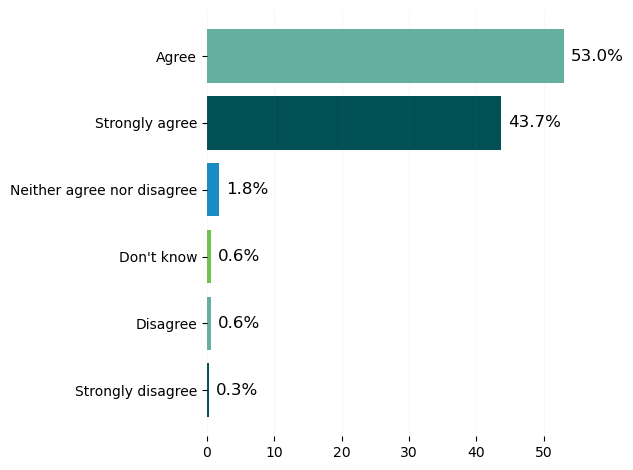

In [32]:
# Plot chart
plot_bar_chart_with_percentage(table, 'ENOUGH', 'Count', colors=colors)

In [33]:
# 'SERIOUS': 'The provider took my preferences seriously',

# Generate table
table = calculate_percentage_table(data, 'SERIOUS')
table.sort_values(by='% of beneficiaries for SERIOUS', ascending=True, inplace=True)
table

,SERIOUS,Count,% of beneficiaries for SERIOUS
5,Strongly disagree,1,0.301205
1,Disagree,2,0.602410
2,Don't know,2,0.602410
3,Neither agree nor disagree,8,2.409639
4,Strongly agree,124,37.349398
0,Agree,195,58.734940


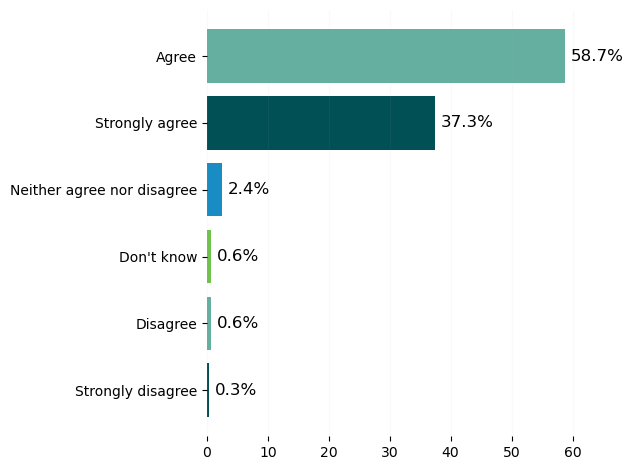

In [34]:
# Plot chart
plot_bar_chart_with_percentage(table, 'SERIOUS', 'Count', colors=colors)

In [35]:
# 'RPRT': 'The provider gave me the opportunity to explain my needs and ask questions',

# Generate table
table = calculate_percentage_table(data, 'RPRT')
table.sort_values(by='% of beneficiaries for RPRT', ascending=True, inplace=True)
table

,RPRT,Count,% of beneficiaries for RPRT
4,Strongly disagree,3,0.903614
1,Disagree,4,1.204819
2,Neither agree nor disagree,6,1.807229
3,Strongly agree,131,39.457831
0,Agree,188,56.626506


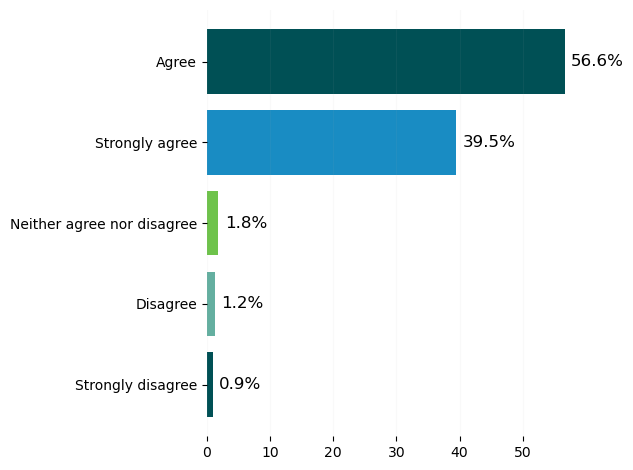

In [36]:
# Plot chart
plot_bar_chart_with_percentage(table, 'RPRT', 'Count', colors=colors)

In [37]:
# 'COMFORT': 'All staff members made me comfortable during my visit today'

# Generate table
table = calculate_percentage_table(data, 'COMFORT')
table.sort_values(by='% of beneficiaries for COMFORT', ascending=True, inplace=True)
table

,COMFORT,Count,% of beneficiaries for COMFORT
4,Strongly disagree,2,0.602410
1,Disagree,3,0.903614
2,Neither agree nor disagree,3,0.903614
3,Strongly agree,129,38.855422
0,Agree,195,58.734940


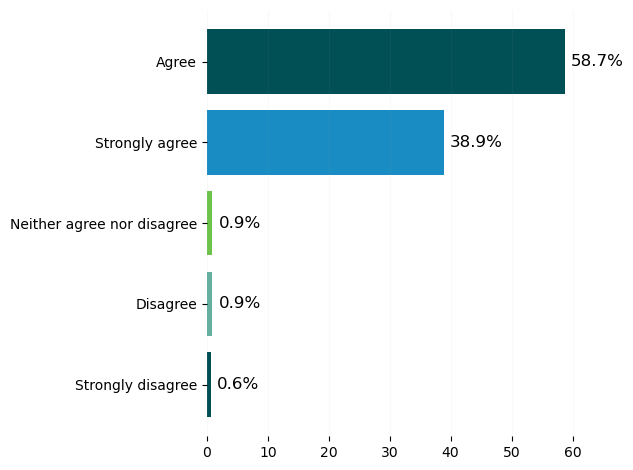

In [38]:
# Plot chart
plot_bar_chart_with_percentage(table, 'COMFORT', 'Count', colors=colors)

In [39]:
# 'GEN_SAT': 'Overall, how satisfied are you with your experience with us today?'

# Generate table
table = calculate_percentage_table(data, 'GEN_SAT')
table.sort_values(by='% of beneficiaries for GEN_SAT', ascending=True, inplace=True)
table

,GEN_SAT,Count,% of beneficiaries for GEN_SAT
0,Refused,1,0.301205
1,Somewhat dissatisfied,4,1.204819
2,Somewhat satisfied,24,7.228916
3,Very satisfied,303,91.265060


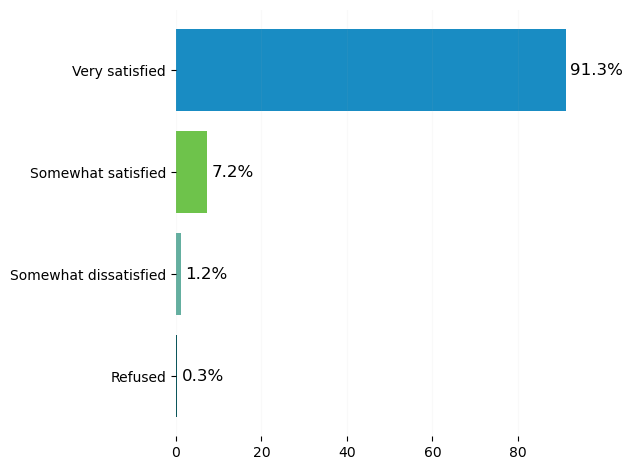

In [40]:
# Plot chart
plot_bar_chart_with_percentage(table, 'GEN_SAT', 'Count', colors=colors)

## 5. Marketing

In [45]:
marketing_variables = {
 'CCUSE_BEF': 'Did you speak to the MSI contact centre through phone or messaging at any point ',
 'CELLOWN': 'Do you have your own cell phone?',
}

In [46]:
variable_list = list(marketing_variables.keys())

# Generate the summary table
marketing_table = summary_percentage_table(
    data,
    variable_list,
    marketing_variables,
    channels_column='FACTYPE',
    channels=channels
)

# Display the result
marketing_table

,Question,Answers,MSI centre,Outreach,MS Lady,Total
0,Did you speak to the MSI contact centre throug...,Yes,20.18%,2.73%,34.26%,19.05%
1,Did you speak to the MSI contact centre throug...,No,79.82%,97.27%,65.74%,80.95%
2,Do you have your own cell phone?,No,37.72%,11.82%,36.11%,28.55%
3,Do you have your own cell phone?,Yes,62.28%,87.27%,63.89%,71.15%
4,Do you have your own cell phone?,Don't know,0.00%,0.91%,0.00%,0.30%


In [48]:
# Save the summary table to an Excel file
file_path = '../analysis_results/marketing_table.xlsx'  # Save to the current directory in Colab
marketing_table.to_excel(file_path, index=False, sheet_name="Summary Table")

# Automatically download the file
# files.download(file_path)

In [49]:
def calculate_top_bottom_responses(data, column, top_n=5):
    """
    Calculate percentages for a given column and return the top N most common responses
    and the least common response.
    """
    total_responses = data.shape[0]

    # Count and calculate percentage
    percentage_table = data.groupby(column).size().reset_index(name='Count')
    percentage_table['Percentage'] = (percentage_table['Count'] / total_responses) * 100
    percentage_table = percentage_table.rename(columns={'Percentage': f'% of beneficiaries for {column}'})

    # Get top N most common responses
    top_responses = percentage_table.nlargest(top_n, 'Count')

    return top_responses

def plot_top_bottom_chart(data, column, label, top_n=12):
    """
    Plot a horizontal bar chart for the top N responses and least common response.
    """
    percentage_table = calculate_top_bottom_responses(data, column, top_n)

    # Plot
    plt.figure(figsize=(10, 6))
    bars = plt.barh(percentage_table[column], percentage_table[f'% of beneficiaries for {column}'], color=colors)

    # Remove border (spines)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    # Add percentage labels
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 1, bar.get_y() + bar.get_height()/2, f"{width:.1f}%",
                 ha='left', va='center', fontsize=12, color='black')

    # Formatting
    plt.grid(axis='x', linestyle='--', alpha=0.5)

    # Show plot
    plt.show()

In [50]:
# Did any of the following play a part in making you aware of the services you received today, or influence your decision to visit today?

info_labels = {
    'IADVERT': 'TV advert or programme',
    'IRADIO': 'Radio advert or programme',
    'INEWS': 'Newspaper/ magazine',
    'IMEET': 'Community meeting or event',
    'INET': 'Website/ Google',
    'ISOCMED': 'Social media',
    'ISIGN': 'Outdoor sign',
    'ISPKR': 'Loudspeaker',
    'IPRMAT': 'Posters/ leaflets / flyers',
    'MSAFG_IRELG': 'Religious Leaders/Groups',
    'INFOOTH': 'Other',
    'INFONO': 'None'
}

info_table = calculate_top_bottom_responses(data, 'INFO')
info_table

,INFO,Count,% of beneficiaries for INFO
26,INFOOTH,67,20.180723
39,ISIGN,45,13.554217
0,IADVERT,40,12.048193
44,ISPKR,31,9.337349
25,INFONO,28,8.433735


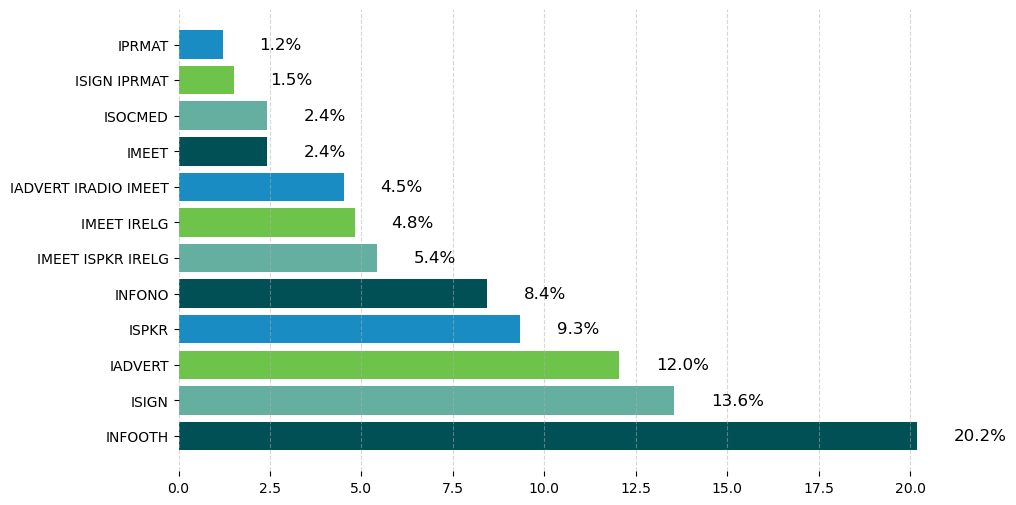

In [51]:
plot_top_bottom_chart(data, 'INFO', "Top and Least Common Factors Influencing Visit")

In [52]:
social_community_context = {
     'POSIPC': 'In my community, I hear positive stories about using contraception',
 'KSANCTION': 'In my community, women are stigmatised if people know that they use contraceptio',
 'KMENSUPP': 'In my community, most men are supportive of their partner(s) using contraception',
 'KCOMSUPP': 'In my community, using modern contraception is accepted',
 'KLEADSUP': 'In my community, local leaders encourage the use of contraception',
 'FPDECMAK': 'Who usually makes decisions about any methods of contraception for yourself?',

}

variable_list = list(social_community_context.keys())  # Replace with your list of questions

# Generate the summary table
social_community_context_table = summary_percentage_table(
    data,
    variable_list,
    social_community_context,
    channels_column='FACTYPE',
    channels=channels
)

# Display the result
social_community_context_table

,Question,Answers,MSI centre,Outreach,MS Lady,Total
0,"In my community, I hear positive stories about...",Strongly agree,33.33%,18.18%,49.07%,33.53%
1,"In my community, I hear positive stories about...",Agree,55.26%,73.64%,42.59%,57.16%
2,"In my community, I hear positive stories about...",Strongly disagree,1.75%,0.00%,0.93%,0.89%
3,"In my community, I hear positive stories about...",Disagree,1.75%,1.82%,0.00%,1.19%
4,"In my community, I hear positive stories about...",Neither agree nor disagree,0.88%,6.36%,0.00%,2.41%
5,"In my community, I hear positive stories about...",Don't know,4.39%,0.00%,7.41%,3.93%
6,"In my community, I hear positive stories about...",Refused,2.63%,0.00%,0.00%,0.88%
7,"In my community, women are stigmatised if peop...",Disagree,25.44%,17.27%,43.52%,28.74%
8,"In my community, women are stigmatised if peop...",Don't know,14.91%,32.73%,10.19%,19.27%
9,"In my community, women are stigmatised if peop...",Agree,48.25%,21.82%,28.70%,32.92%


In [53]:
# Save the summary table to an Excel file
file_path = '../analysis_results/social_community_context_table.xlsx'  # Save to the current directory in Colab
social_community_context_table.to_excel(file_path, index=False, sheet_name="Summary Table")

# Automatically download the file
# files.download(file_path)

# Inferrential Analysis

1. Chi-Square Test for Association
- Purpose: To determine if there is a significant relationship between categorical variables.
- Examples:
 1. Association between contraceptive method received (FPreceived) and client satisfaction (GEN_SAT).
 2. Relationship between education level (EDU) and contraceptive use history (FPEVER).
Whether gender (GENDER) influences pain perception (PAINSCALE_DREM, PAINSCALE_ACM).

In [54]:
contraceptive_client = data.groupby(['FPreceived', 'GEN_SAT']).size().reset_index(name='frequency')

In [55]:
contraceptive_client

,FPreceived,GEN_SAT,frequency
0,EC,Very satisfied,3
1,EC MC,Very satisfied,1
2,FC,Very satisfied,7
3,FC MC,Very satisfied,1
4,IMP,Refused,1
5,IMP,Somewhat satisfied,1
6,IMP,Very satisfied,34
7,INJ,Somewhat dissatisfied,1
8,INJ,Somewhat satisfied,3
9,INJ,Very satisfied,37


In [56]:
# Pivot the table to create a contingency table

contengency_table = pd.pivot_table(contraceptive_client, values='frequency',
                                   index='FPreceived',
                                   columns='GEN_SAT',
                                   aggfunc='sum',
                                   fill_value=0)

In [57]:
contengency_table

GEN_SAT,Refused,Somewhat dissatisfied,Somewhat satisfied,Very satisfied
FPreceived,,,,
EC,0,0,0,3
EC MC,0,0,0,1
FC,0,0,0,7
FC MC,0,0,0,1
IMP,1,0,1,34
INJ,0,1,3,37
INJ MC,0,0,0,2
IUD,0,1,6,32
MC,0,1,7,80


In [58]:
# Perform the Chi-Square test for association
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contengency_table)

In [59]:
# Display results
print("Chi-Square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)
print("P-Value:", p)

Chi-Square Statistic: 21.39647357503626
Degrees of Freedom: 45
Expected Frequencies:
[[1.00671141e-02 3.02013423e-02 2.11409396e-01 2.74832215e+00]
 [3.35570470e-03 1.00671141e-02 7.04697987e-02 9.16107383e-01]
 [2.34899329e-02 7.04697987e-02 4.93288591e-01 6.41275168e+00]
 [3.35570470e-03 1.00671141e-02 7.04697987e-02 9.16107383e-01]
 [1.20805369e-01 3.62416107e-01 2.53691275e+00 3.29798658e+01]
 [1.37583893e-01 4.12751678e-01 2.88926174e+00 3.75604027e+01]
 [6.71140940e-03 2.01342282e-02 1.40939597e-01 1.83221477e+00]
 [1.30872483e-01 3.92617450e-01 2.74832215e+00 3.57281879e+01]
 [2.95302013e-01 8.85906040e-01 6.20134228e+00 8.06174497e+01]
 [1.00671141e-02 3.02013423e-02 2.11409396e-01 2.74832215e+00]
 [3.35570470e-03 1.00671141e-02 7.04697987e-02 9.16107383e-01]
 [6.71140940e-03 2.01342282e-02 1.40939597e-01 1.83221477e+00]
 [2.31543624e-01 6.94630872e-01 4.86241611e+00 6.32114094e+01]
 [3.35570470e-03 1.00671141e-02 7.04697987e-02 9.16107383e-01]
 [3.35570470e-03 1.00671141e-02 7

In [60]:
# Interpretation
if p < 0.05:
    print("There is a significant association between Contraceptive Method and Satisfaction.")
else:
    print("There is no significant association between Contraceptive Method and Satisfaction.")

There is no significant association between Contraceptive Method and Satisfaction.


In [61]:
data['WAIT'].unique()

array(['Strongly agree', 'Agree', 'Neither agree nor disagree',
       'Strongly disagree'], dtype=object)

In [62]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table for EDUCATION and METHOD USED
contingency_table = pd.crosstab(data['EDU'], data['FPreceived'])

# Perform the Chi-Square Test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

In [63]:
contingency_table

FPreceived,EC,EC MC,FC,FC MC,IMP,INJ,INJ MC,IUD,MC,MC EC,MC EC INJ,MC INJ,OC,OC EC,OC MC,REF
EDU,,,,,,,,,,,,,,,,
Completed primary,0,0,0,0,4,1,0,11,12,0,0,0,12,0,0,0
"Completed secondary, vocational or technical",0,1,0,0,2,0,0,2,4,0,0,0,3,1,0,0
None / non-formal,2,0,7,0,20,29,1,20,55,3,0,2,34,0,0,3
Some primary,0,0,0,0,4,7,1,2,14,0,1,0,16,0,0,0
"Some secondary, vocational or technical",1,0,0,0,1,1,0,2,1,0,0,0,1,0,1,0
Some tertiary or higher,0,0,0,1,5,3,0,2,2,0,0,0,3,0,0,0


In [64]:
# Print the results
print("\nChi-Square Test Results:")
print(f"Chi-Square Value: {chi2}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")

# Interpretation of results
if p_value < 0.05:
    print("\nThere is a significant association between education level and methods used.")
else:
    print("\nThere is no significant association between education level and methods used.")


Chi-Square Test Results:
Chi-Square Value: 158.24585986834632
P-Value: 6.805783492385852e-08
Degrees of Freedom: 75

There is a significant association between education level and methods used.


## The Relationship Between Education Level and Contraceptive Methods Used
###Background
In this study, we examine whether there is a significant association between a person’s education level and the type of contraceptive methods they use. We hypothesize that individuals with higher education levels are more likely to use modern contraceptive methods due to increased access to information, healthcare, and an understanding of family planning.

- The dataset includes two key variables:

 - EDU (Education Level): Categories such as "Completed primary," "Some primary," "Completed secondary, vocational or technical," "Some tertiary or higher," and "None / non-formal."
 - FPreceived (Contraceptive Methods Used): Various contraceptive methods, such as "EC" (Emergency Contraception), "IUD" (Intrauterine Device), "OC" (Oral Contraceptives), "FC" (Female Condom), "IMP" (Injectable), and others.

### Key Observations from the Contingency Table
The contingency table provides several important insights:

1. Higher Education Levels and Use of Modern Contraceptive Methods:
 - Individuals with higher education levels (e.g., "Some tertiary or higher") tend to use more modern contraceptive methods, such as "IUD" and "OC," as seen in the table.
 - The "Completed secondary, vocational or technical" and "Some tertiary or higher" groups show usage of methods like "IUD" and "OC," indicating a preference for more effective and modern contraceptive options.
2. Lower Education Levels and Use of Traditional Methods:
 - The "None / non-formal" group shows a relatively high frequency of contraceptive use, but with a mix of methods such as "EC" (Emergency Contraception), "FC" (Female Condom), and "IMP" (Injectable). This suggests that people in this group may have less access to modern contraceptive methods or may be using a wider variety of methods for different needs.
3. Intermediate Education Levels:
 - Groups such as "Some primary" and "Some secondary, vocational or technical" use methods like "IMP," "INJ," and "MC" (Modern Contraceptives), but they show less diversity in contraceptive use compared to those with higher education. These groups may still rely on traditional or less effective methods more than individuals with higher education.

## Interpretation
The results of the Chi-Square test and the analysis of the contingency table support the hypothesis that education level influences the choice of contraceptive methods. The following key points can be drawn from the findings:

 - Access to Information: People with higher education levels are likely to have better access to family planning information and healthcare, which might explain their preference for modern contraceptive methods.

- Healthcare Access and Decision Making: Education can empower individuals to make informed decisions about reproductive health. Those with higher education are likely more aware of the long-term benefits and risks associated with different methods of contraception.

- Targeted Interventions: The data suggests that targeted family planning interventions may be needed for individuals with lower levels of education to ensure they have access to modern contraceptive options. These interventions could focus on improving awareness, access, and affordability of modern contraception methods.